### Team 24- Question 3


### Import statements 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

### Class and function definitions

In [2]:
class Perceptron:
    
    def __init__(self, eta):
        self.eta = eta
        
    def f(self, s, beta = 100):
        return 1/(1+np.exp(-beta*s))
        
    def one_epoch(self, X, Y):
        w_old = self.w.copy()

        for t in range(X.shape[0]):
            xt = X[t, :]
            yt = Y[t]
            if yt*(np.dot(w_old, xt)) <= 0:
                w_new = w_old + self.eta*yt*xt 
            else:
                w_new = w_old
            w_old = w_new
        self.w = w_new
    
    def line(self, w, X):
        x = np.linspace(np.min(X[:, 1])-1 , np.max(X[:, 1])+1, 50)
        c = -w[0]/w[-1]
        m = -w[1]/w[-1]
        y = m*x + c
        return x,y 

    def predict(self, w, X):   
        Y_hat = np.zeros(X.shape[0])
        class_1 = np.argwhere(np.dot(X, w) >= 0)
        class_0 = np.argwhere(np.dot(X, w) < 0)
        Y_hat[class_1] = 1
        Y_hat[class_0] = -1
        return Y_hat   
        
    def accuracy(self, Y_true, Y_pred):
    # Returns the accuracy of predicted classes
    # Inputs:
    #     Y_true -----> True class labels
    #     Y_pred -----> Predicted class labels
    # Returns:
    #     tp/N -------> Accuracy of predicted class labels 

        tp = len(np.argwhere(Y_true==Y_pred))
        N  = Y_true.shape[0]
        return tp/N
   
    def train(self, X, Y, max_iter=1000):
        
        epoch = 0
        while epoch<max_iter:
            epoch += 1
            if epoch == 1:
                self.w =np.ones(X.shape[1])
                error_old = -10
            else:
                error_old = error_new
            self.one_epoch(X,Y)
            
            Y_hat = self.predict(self.w, X)
            error_new = 1 - self.accuracy(Y, Y_hat)
            print('Epoch: {0}, Error: {1}'.format(epoch, error_new))
            
            if error_new==0.0:
                print('Converged!!')
                break
        
            if abs(error_old-error_new)/(error_new) < 0.0001 and error_new < 0.01:
                print('Converged!!')
                break
            
        if epoch == max_iter:
            print('Did not converge!')             

### Loading the Dataset 1


In [3]:
data = pd.read_csv('Dataset_1_Team_24.csv')
data.head()

,# x_1,x_2,Class_label
0,251.290678,-307.404235,1
1,313.403318,-270.377457,1
2,-302.947861,395.402585,0
3,270.918576,-318.853878,1
4,-286.806780,392.455625,0


In [4]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

### Visualising the data

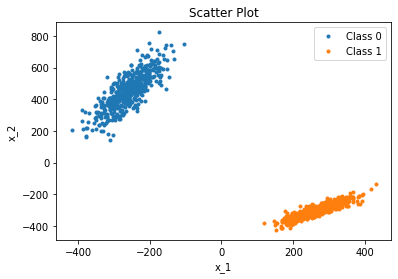

In [5]:
classes = np.unique(Y)
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Linear Kernel

In [6]:
# Appending with 1s
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [7]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.0
Converged!!


In [8]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a)
Y_test_hat_lin = nn.predict(nn.w, X_test_a)

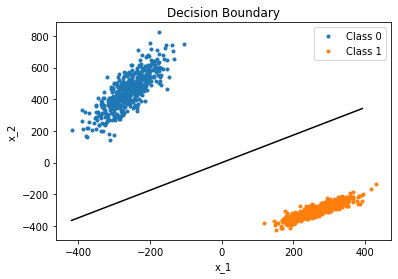

In [9]:
x_l, y_l = nn.line(nn.w, X_train_a)

classes = np.unique(Y)
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.plot(x_l, y_l, '-k')
plt.title('Decision Boundary')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Polynomial Kernel

### Loading the Dataset 3

In [10]:
data = pd.read_csv('Dataset_3_Team_24.csv')
data.head()

,# x_1,x_2,Class_label
0,0.556383,-0.249476,1
1,-0.237175,0.534400,1
2,0.182019,-0.968976,0
3,-0.663934,0.777924,0
4,-0.855293,-0.272750,0


In [11]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]]

### Visualising the data

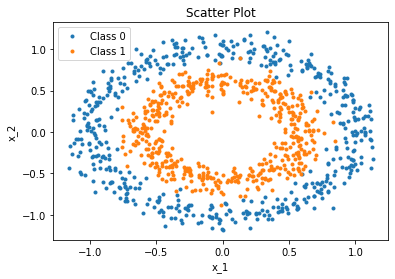

In [12]:
classes = np.unique(Y)
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Linear Kernel 

In [13]:
# Appending with 1s
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [14]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.49875
Epoch: 2, Error: 0.5
Epoch: 3, Error: 0.48750000000000004
Epoch: 4, Error: 0.50125
Epoch: 5, Error: 0.49750000000000005
Epoch: 6, Error: 0.49624999999999997
Epoch: 7, Error: 0.49875
Epoch: 8, Error: 0.49375
Epoch: 9, Error: 0.5025
Epoch: 10, Error: 0.49
Epoch: 11, Error: 0.50125
Epoch: 12, Error: 0.49624999999999997
Epoch: 13, Error: 0.5
Epoch: 14, Error: 0.5
Epoch: 15, Error: 0.49250000000000005
Epoch: 16, Error: 0.49875
Epoch: 17, Error: 0.495
Epoch: 18, Error: 0.505
Epoch: 19, Error: 0.495
Epoch: 20, Error: 0.49750000000000005
Epoch: 21, Error: 0.5037499999999999
Epoch: 22, Error: 0.49624999999999997
Epoch: 23, Error: 0.49750000000000005
Epoch: 24, Error: 0.49875
Epoch: 25, Error: 0.48875
Epoch: 26, Error: 0.5025
Epoch: 27, Error: 0.49624999999999997
Epoch: 28, Error: 0.505
Epoch: 29, Error: 0.5
Epoch: 30, Error: 0.5
Epoch: 31, Error: 0.5
Epoch: 32, Error: 0.49624999999999997
Epoch: 33, Error: 0.5
Epoch: 34, Error: 0.49875
Epoch: 35, Error: 0.49875
Epoch: 36

Epoch: 278, Error: 0.505
Epoch: 279, Error: 0.49875
Epoch: 280, Error: 0.49875
Epoch: 281, Error: 0.5
Epoch: 282, Error: 0.49124999999999996
Epoch: 283, Error: 0.49875
Epoch: 284, Error: 0.49375
Epoch: 285, Error: 0.49
Epoch: 286, Error: 0.49624999999999997
Epoch: 287, Error: 0.50625
Epoch: 288, Error: 0.50125
Epoch: 289, Error: 0.49875
Epoch: 290, Error: 0.50125
Epoch: 291, Error: 0.49
Epoch: 292, Error: 0.5
Epoch: 293, Error: 0.48875
Epoch: 294, Error: 0.49624999999999997
Epoch: 295, Error: 0.5
Epoch: 296, Error: 0.5
Epoch: 297, Error: 0.5
Epoch: 298, Error: 0.49750000000000005
Epoch: 299, Error: 0.505
Epoch: 300, Error: 0.5025
Epoch: 301, Error: 0.495
Epoch: 302, Error: 0.49750000000000005
Epoch: 303, Error: 0.5
Epoch: 304, Error: 0.5
Epoch: 305, Error: 0.5037499999999999
Epoch: 306, Error: 0.49624999999999997
Epoch: 307, Error: 0.49250000000000005
Epoch: 308, Error: 0.49875
Epoch: 309, Error: 0.5
Epoch: 310, Error: 0.5
Epoch: 311, Error: 0.50625
Epoch: 312, Error: 0.5
Epoch: 313, E

Epoch: 566, Error: 0.5025
Epoch: 567, Error: 0.49624999999999997
Epoch: 568, Error: 0.49250000000000005
Epoch: 569, Error: 0.49624999999999997
Epoch: 570, Error: 0.49750000000000005
Epoch: 571, Error: 0.49875
Epoch: 572, Error: 0.5
Epoch: 573, Error: 0.5
Epoch: 574, Error: 0.49875
Epoch: 575, Error: 0.5075000000000001
Epoch: 576, Error: 0.48875
Epoch: 577, Error: 0.5025
Epoch: 578, Error: 0.505
Epoch: 579, Error: 0.49750000000000005
Epoch: 580, Error: 0.5037499999999999
Epoch: 581, Error: 0.49375
Epoch: 582, Error: 0.5
Epoch: 583, Error: 0.49375
Epoch: 584, Error: 0.5
Epoch: 585, Error: 0.50125
Epoch: 586, Error: 0.5
Epoch: 587, Error: 0.48875
Epoch: 588, Error: 0.50125
Epoch: 589, Error: 0.49875
Epoch: 590, Error: 0.5
Epoch: 591, Error: 0.5
Epoch: 592, Error: 0.50125
Epoch: 593, Error: 0.49375
Epoch: 594, Error: 0.505
Epoch: 595, Error: 0.49750000000000005
Epoch: 596, Error: 0.5
Epoch: 597, Error: 0.505
Epoch: 598, Error: 0.49624999999999997
Epoch: 599, Error: 0.495
Epoch: 600, Error:

Epoch: 844, Error: 0.49375
Epoch: 845, Error: 0.505
Epoch: 846, Error: 0.49750000000000005
Epoch: 847, Error: 0.5
Epoch: 848, Error: 0.50875
Epoch: 849, Error: 0.495
Epoch: 850, Error: 0.49875
Epoch: 851, Error: 0.5037499999999999
Epoch: 852, Error: 0.5037499999999999
Epoch: 853, Error: 0.49124999999999996
Epoch: 854, Error: 0.49375
Epoch: 855, Error: 0.48875
Epoch: 856, Error: 0.49875
Epoch: 857, Error: 0.49250000000000005
Epoch: 858, Error: 0.50125
Epoch: 859, Error: 0.49750000000000005
Epoch: 860, Error: 0.5
Epoch: 861, Error: 0.48750000000000004
Epoch: 862, Error: 0.505
Epoch: 863, Error: 0.5
Epoch: 864, Error: 0.495
Epoch: 865, Error: 0.505
Epoch: 866, Error: 0.5
Epoch: 867, Error: 0.49375
Epoch: 868, Error: 0.49750000000000005
Epoch: 869, Error: 0.49750000000000005
Epoch: 870, Error: 0.49250000000000005
Epoch: 871, Error: 0.49624999999999997
Epoch: 872, Error: 0.5
Epoch: 873, Error: 0.5075000000000001
Epoch: 874, Error: 0.50875
Epoch: 875, Error: 0.495
Epoch: 876, Error: 0.49875


In [15]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a)
Y_test_hat_lin = nn.predict(nn.w, X_test_a)

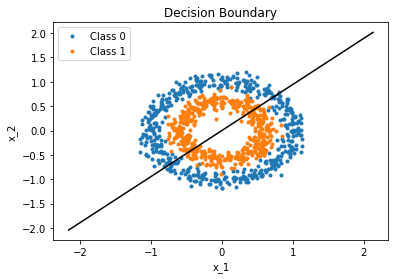

In [16]:
x_l, y_l = nn.line(nn.w, X_train_a)

classes = np.unique(Y)
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.plot(x_l, y_l, '-k')
plt.title('Decision Boundary')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Polynomial Kernel